INFO:root:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/resources/Venise/Venise_001.tif"...
INFO:root:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/resources/Venise/Venise_002.tif"...
INFO:root:Reading "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/resources/Venise/Venise_003.tif"...
/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: overflow encountered in exp


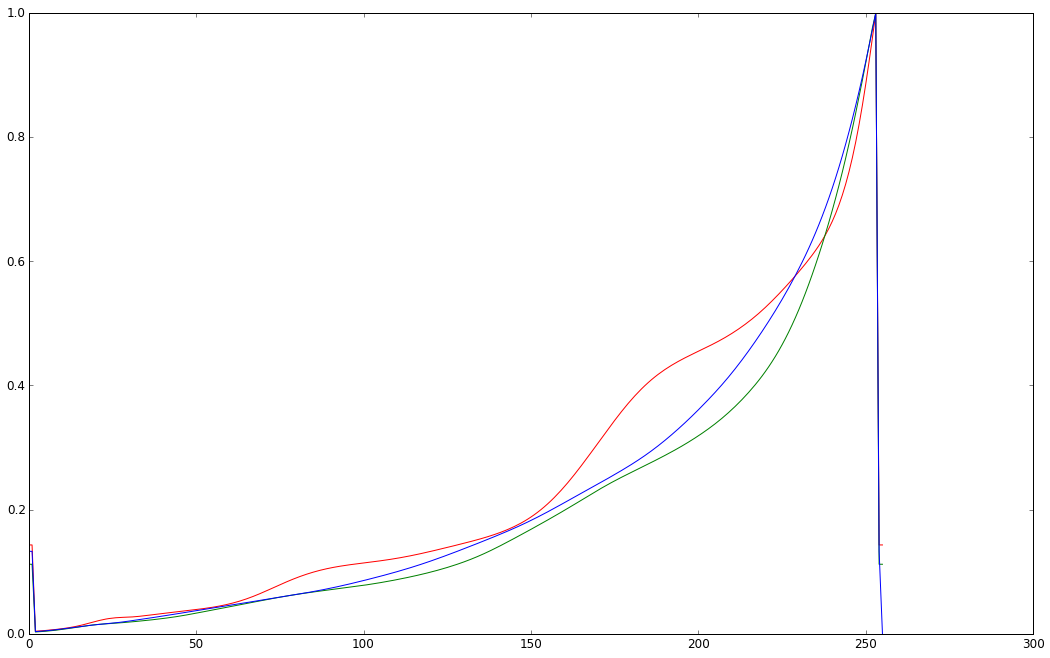

In [1]:
%matplotlib inline

import glob
import logging
import numpy as np
import pylab
from fractions import Fraction

import colour
from colour import tsplit, tstack
from colour.plotting import *

from colour_hdri.camera_response_functions import g_solve, samples_Grossberg
from colour_hdri.exif import get_exif_data
from colour_hdri.exposure import exposure_value, average_luminance
from colour_hdri.image import Image, ImageStack, Metadata
from colour_hdri.weighting_functions import weighting_function_Debevec1997

LOGGER = logging.getLogger()
LOGGER.setLevel(logging.DEBUG)

DIRECTORY = '/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/resources/Venise/'
TIF_FILES = glob.glob('{0}/*.tif'.format(DIRECTORY))


def process(tif_files):
    images_stack = ImageStack()
    for tif_file in tif_files:
        LOGGER.info('Reading "{}"...'.format(tif_file))
        exif_data = get_exif_data(tif_file)
        f_number = float(exif_data['EXIF']['F Number'][0])
        exposure_time = float(Fraction(
            exif_data['EXIF']['Exposure Time'][0]))
        iso = float(exif_data['EXIF']['ISO'][0])

        images_stack.append(Image(tif_file,
                            colour.read_image(tif_file),
                            Metadata(f_number, exposure_time, iso)))
    
    RGB_f = camera_response_function_Debevec1997(images_stack)
    RGB_f[np.isinf(RGB_f)] = 1
    RGB_f /= np.max(RGB_f, axis=0)
    
    pylab.plot(RGB_f)  
    pylab.show()
    

process(TIF_FILES)